<a href="https://colab.research.google.com/github/MarioROT/CV-MAI/blob/main/Session%205/p05_corner_detection_and_ORB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory #2_2 : Corner detection and ORB

At the end of this laboratory, you would get familiarized with

*   Corner Detection using FAST and Harris Corners
*   ORB feature detectors and descriptors

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [ ]:
%%shell
git clone https://github.com/mariorot/CV-MAI
mv CV-MAI/scripts/* /content/
mv 'CV-MAI/Session 5/images' /content/

Cloning into 'CV-MAI'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 220 (delta 9), reused 33 (delta 4), pack-reused 175
Receiving objects: 100% (220/220), 26.08 MiB | 27.28 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, feature, filters, io, transform

import custom_plots as cp

imdir = "images/"

# Corner Detection

### Exercise: #1

*    Detect the corners in the image starbucks4.jpg. Use corner_fast to extract FAST corners for the given image and corner_peaks to find corners in the corner measure response image.
*   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.



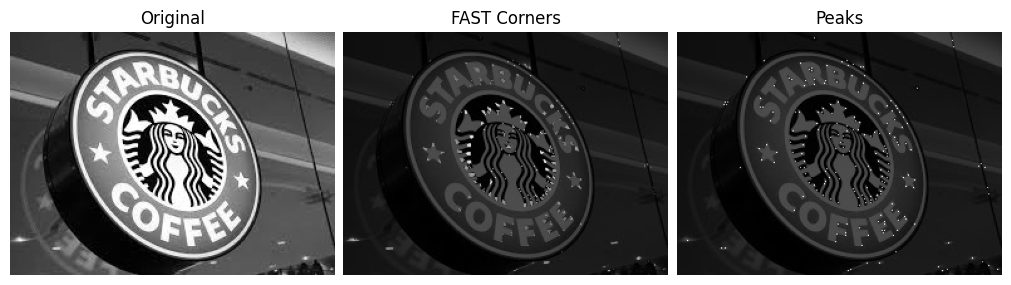

In [ ]:
# solution
sb4 = io.imread(imdir + '/starbucks/starbucks4.jpg', True)
corners = feature.corner_fast(sb4)
peaks = feature.corner_peaks(corners, indices = False)

cg = cp.custom_grids([sb4]*3, 1, 3, ["Original", "FAST Corners", "Peaks"], axis='off', cmap='gray')
cg.show()
cg.overlay_image([1,2],[corners, peaks],['gray'], [0.7])

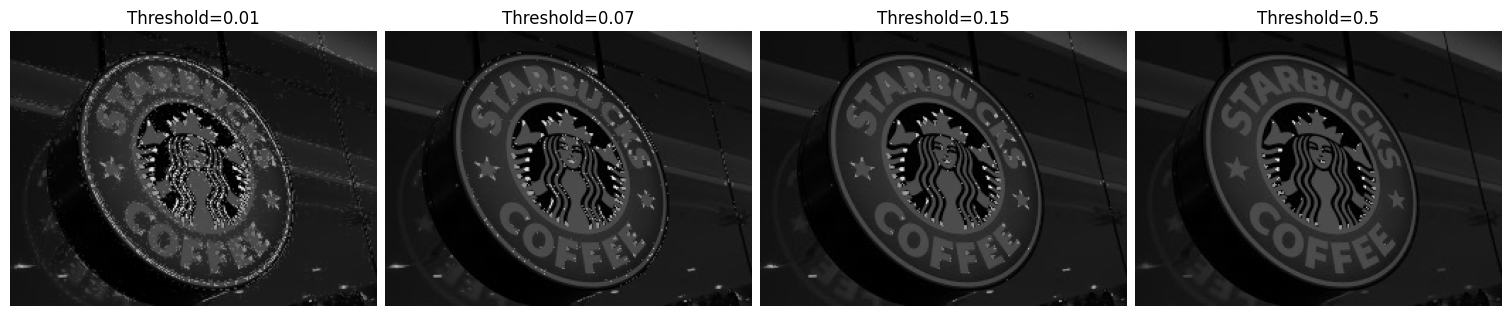

In [ ]:
corners = [feature.corner_fast(sb4, threshold=t) for t in [0.01,0.07,0.15,0.5]]
titles = [f'Threshold={t}' for t in [0.01,0.07,0.15,0.5]]

cg = cp.custom_grids([sb4]*len(corners), 1, len(corners), titles, axis='off', cmap='gray', figsize=(15,5))
cg.show()
cg.overlay_image(range(len(corners)),corners,['gray'], [0.7])

*   Analyze and discuss the effect of changing **'threshold'** in the corner_fast function.

**Solution**

As seen in the images above, a lower threshold value results in more corner detections, while a higher threshold value results in fewer. Setting a very low threshold value may provide unfavorable results, as there are more detections that may be undesirable.

...

*   Repeat the exercise by replacing FAST corners with Harris corners.

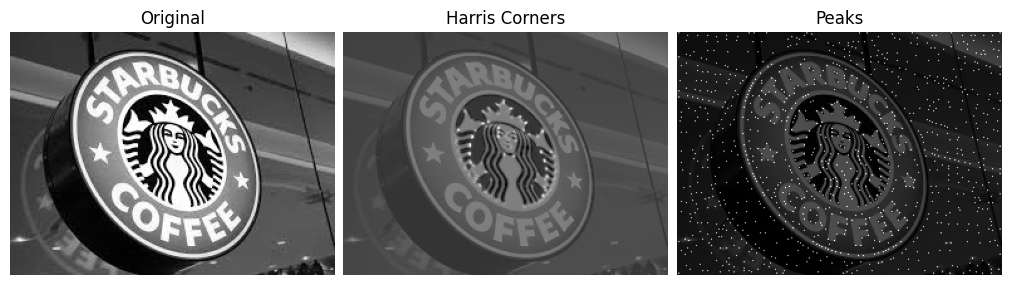

In [ ]:
# solution
corners = feature.corner_harris(sb4)
peaks = feature.corner_peaks(corners, indices = False)

cg = cp.custom_grids([sb4]*3, 1, 3, ["Original", "Harris Corners", "Peaks"], axis='off', cmap='gray')
cg.show()
cg.overlay_image([1,2],[corners, peaks],['gray'], [0.7])


*   Do you find difference between both the techniques? If so, why and what difference do you observe?

**Solution**

*(Double-click or enter to edit)*

...

# ORB feature detector and binary descriptor

### Exercise #0: Compute ORB descriptors and find descriptors match

*   Load 'astronaut' image from data module.
*   Convert the image to grayscale.
*   Create a copy of the image and rotate it by 180&deg;



In [ ]:
img1 = color.rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

*   Create an ORB feature detector with default parameters. *Hint: ORB feature detector is available in skimage.feature module.*



In [ ]:
descriptor_extractor = feature.ORB(n_keypoints=200)

*   Extract the keypoints and descriptors using detect_and_extract function for both the images

In [ ]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

*   Descriptors can be matched using match_descriptors function available in skimage.feature module
*   The matches can be plotted using the plot_matches function available in skimage.feature module

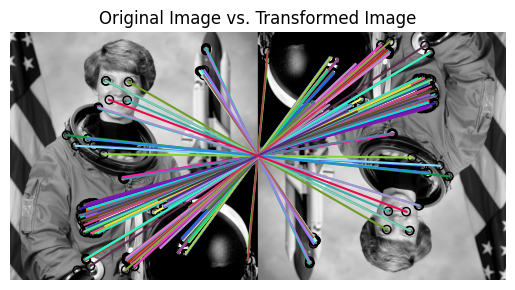

In [ ]:
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Transformed Image")
plt.show()

### Exercise: #1

*   Analyze and discuss the effect of changing the parameter **'max_ratio'** in the match_descriptors function.

In [ ]:
for t in [.1, .5, .9,5., 15., 50.]:
  matches12 = feature.match_descriptors(descriptors1, descriptors2, max_ratio=t)
  print('max_ratio: ', t, ' -- Matches: ', matches12.shape[0])

max_ratio:  0.1  -- Matches:  198
max_ratio:  0.5  -- Matches:  198
max_ratio:  0.9  -- Matches:  198
max_ratio:  5.0  -- Matches:  198
max_ratio:  15.0  -- Matches:  198
max_ratio:  50.0  -- Matches:  198


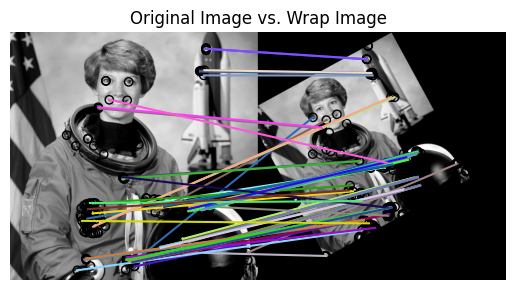

In [ ]:
tform = transform.AffineTransform(scale=(1.5, 1.5), rotation=0.5,
                                  translation=(150, -200))
img_warp = transform.warp(img1, tform)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_warp)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
feature.plot_matches(plt, img1, img_warp, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Wrap Image")
plt.show()

In [ ]:
for t in [.1, .5, .9,5., 15., 50.]:
  matches12 = feature.match_descriptors(descriptors1, descriptors2, max_ratio=t)
  print('max_ratio: ', t, ' -- Matches: ', matches12.shape[0])

max_ratio:  0.1  -- Matches:  0
max_ratio:  0.5  -- Matches:  18
max_ratio:  0.9  -- Matches:  61
max_ratio:  5.0  -- Matches:  76
max_ratio:  15.0  -- Matches:  76
max_ratio:  50.0  -- Matches:  76


**Solution**

---
*First Experiment: applying ORB feature detector with just the images rotated 180°*
 - Results

| max_ratio | Matches |
|-----------|---------|
| 0.1       | 198     |
| 0.5       | 198     |
| 0.9       | 198     |
| 5         | 198     |
| 15        | 198     |
| 50        | 198     |

---
*Second Experiment: applying ORB feature detector with rotation, resizing and translation*
- Results

| max_ratio | Matches |
|-----------|---------|
| 0.1       | 0     |
| 0.5       | 18     |
| 0.9       | 61     |
| 5         | 76     |
| 15        | 76     |
| 50        | 76     |

---

According to the documentation for the match_descriptors function, max_ratio is designed to be more sensitive to the number of matches returned as the parameter value increases.

As seen in the first experiment, just rotating the image 180° and changing max_ratio had no effect on the number of matches between the two example images. This is probably due to the 180° rotation, which is not a major complication for the algorithm in finding matching descriptors, since in the following rotation experiment (Exercise #4), a similar number of matches were found when comparing the original image versus itself but rotated 180°.

However, when applying more transformations to the image (second experiment), we can see the effect of the `max_ratio` parameter, when it is higher more matching descriptors are found until a certain amount where it stabilizes.


*   What do you infer from **'harris_k'**, **'n_scales'**, **'fast_n'**, **'fast_threshold'** parameters in ORB function?

**Solution**

- **harris_k**:is meant to differentiate between edges and corners. A smaller value of this parameter will detect sharper corners.

- **n_scales**: defines how many different scales should be used for detection.

- **fast_n**: defines how many pixels of the circle surrounding the object pixel must meet the threshold requirements for a corner to be recognized.

- **fast_threshold**: defines the threshold of darkness or lightness that a pixel of the circle surrounding the object pixel must have to be considered. This value is used in combination with fast_n.

...

### Exercise: #2
*   Using the above example, create a function get_ORB, that takes two images as parameters and returns the keypoints of both images and descriptor matches

In [ ]:
# solution
def get_ORB(img1, img2, n_keyspoints = 200, max_ratio=0.15):
  descriptor_extractor = feature.ORB(n_keypoints=n_keyspoints)

  descriptor_extractor.detect_and_extract(img1)
  keypoints1 = descriptor_extractor.keypoints
  descriptors1 = descriptor_extractor.descriptors

  descriptor_extractor.detect_and_extract(img2)
  keypoints2 = descriptor_extractor.keypoints
  descriptors2 = descriptor_extractor.descriptors

  matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=max_ratio)

  return keypoints1, keypoints2, matches12

*   Using the above function, detect the correspondences between the model image 'starbucks.jpg' with the scene image 'starbucks4.jpg'
*   Plot the matches between the two images.

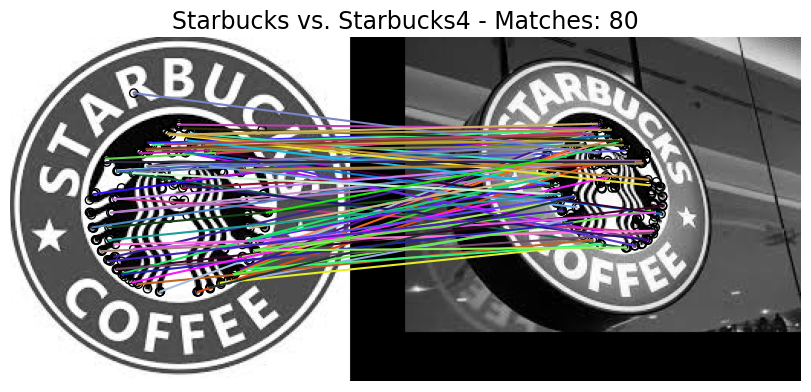

In [ ]:
# solution
sbCol = {i:io.imread_collection(imdir + f'starbucks/starbucks{i}.*')[0] for i in ['',2,4,5,6,'Cup']}
ex2 = cp.custom_grids([sbCol[''], sbCol[4]],1,1, axis= 'off', title_size=17, figsize=(8,5))
ex2.match_points(0,[1], autoTitles=["Starbucks vs. Starbucks4"])

### Exercise: #3

*   Using "starbucks.jpg" image as a model, show its matches to all Starbucks images.
*   Show the number of the matches for the pair as title for each plot.

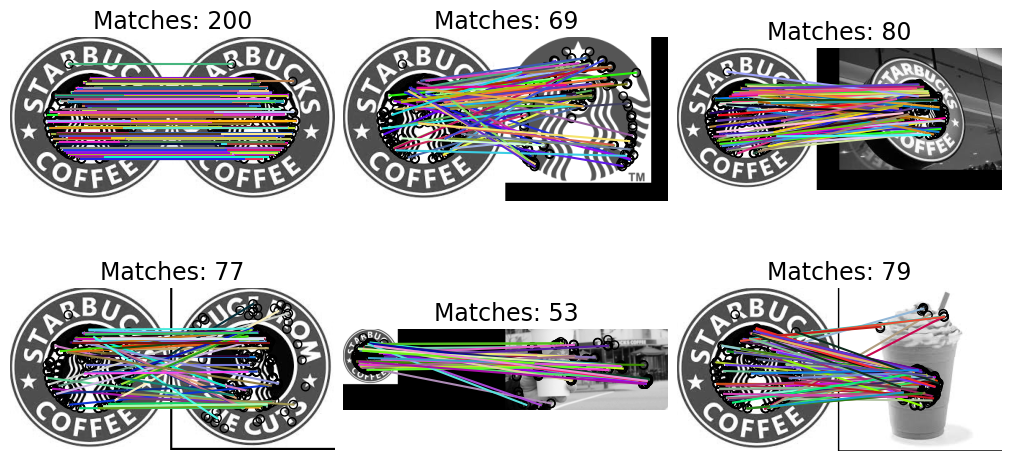

In [ ]:
# solution
ex3 = cp.custom_grids(list(sbCol.values()),2,3, axis= 'off', title_size=17, figsize=(10,5))
ex3.match_points(0,[0,1,2,3,4,5], autoTitles=True)

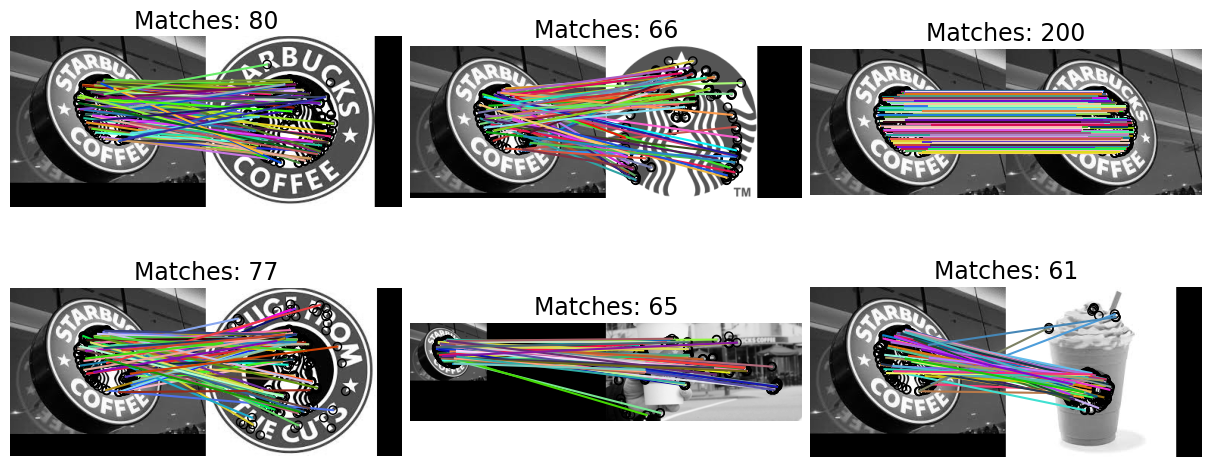

In [ ]:
ex3.figsize = (12,5)
ex3.match_points(2,[0,1,2,3,4,5], autoTitles=True)

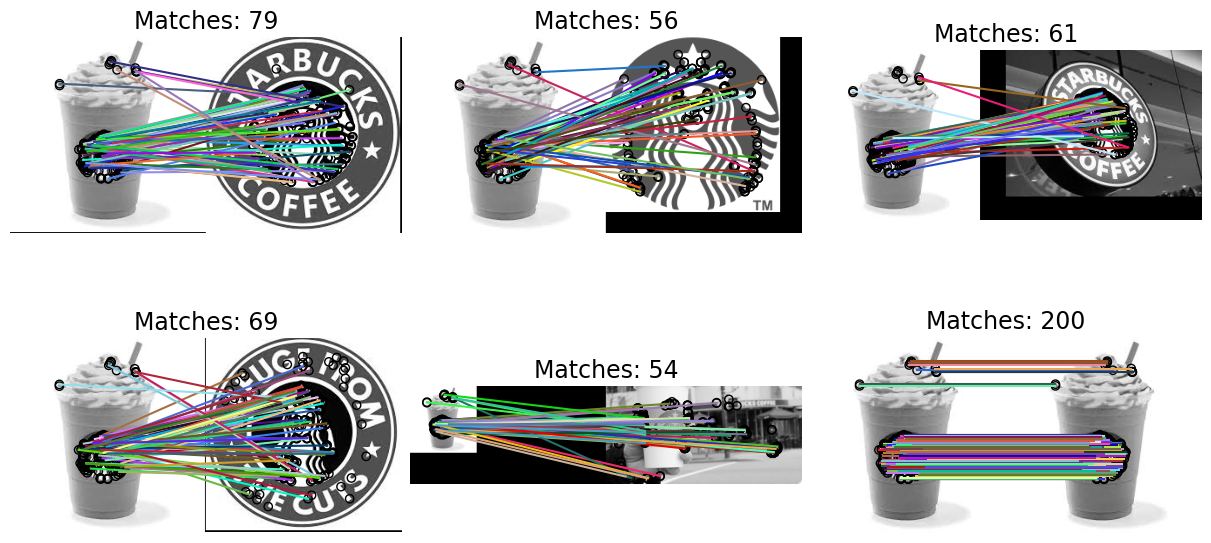

In [ ]:
ex3.figsize = (12,6)
ex3.match_points(5,[0,1,2,3,4,5], autoTitles=True)

*   Comment on the performance of the algorithm with respect to each image. When do you think the algorithm works better?

**Solution**

The algorithm obtains the best results when compared to the same image, with 200 matches in all our experiments. The next comparisons get worse results, mostly below 80 matches. Even when the image is almost the same as the original, but with a different perspective. The worst performance occurs when the logo is not projected on a flat surface, plus the illumination is not the same as the original. Some compared images produce similar values, probably because they vary in some combination of image size and structure.

Apart from comparing the original image to itself, the algorithm works best when the image structure is the same, even regardless of perspective.



...

### Exercise: #4

*   Repeate **Exercise #2**, by changing the orientation of the model image by rotating it and comparing it with its original version.
*   Create 8 orientations of the model image by rotating the image by 45&deg; (0, 45, 90, 135, 180, 225, 270, 315). *Hint: You can use the rotate() function from skimage.transform.*

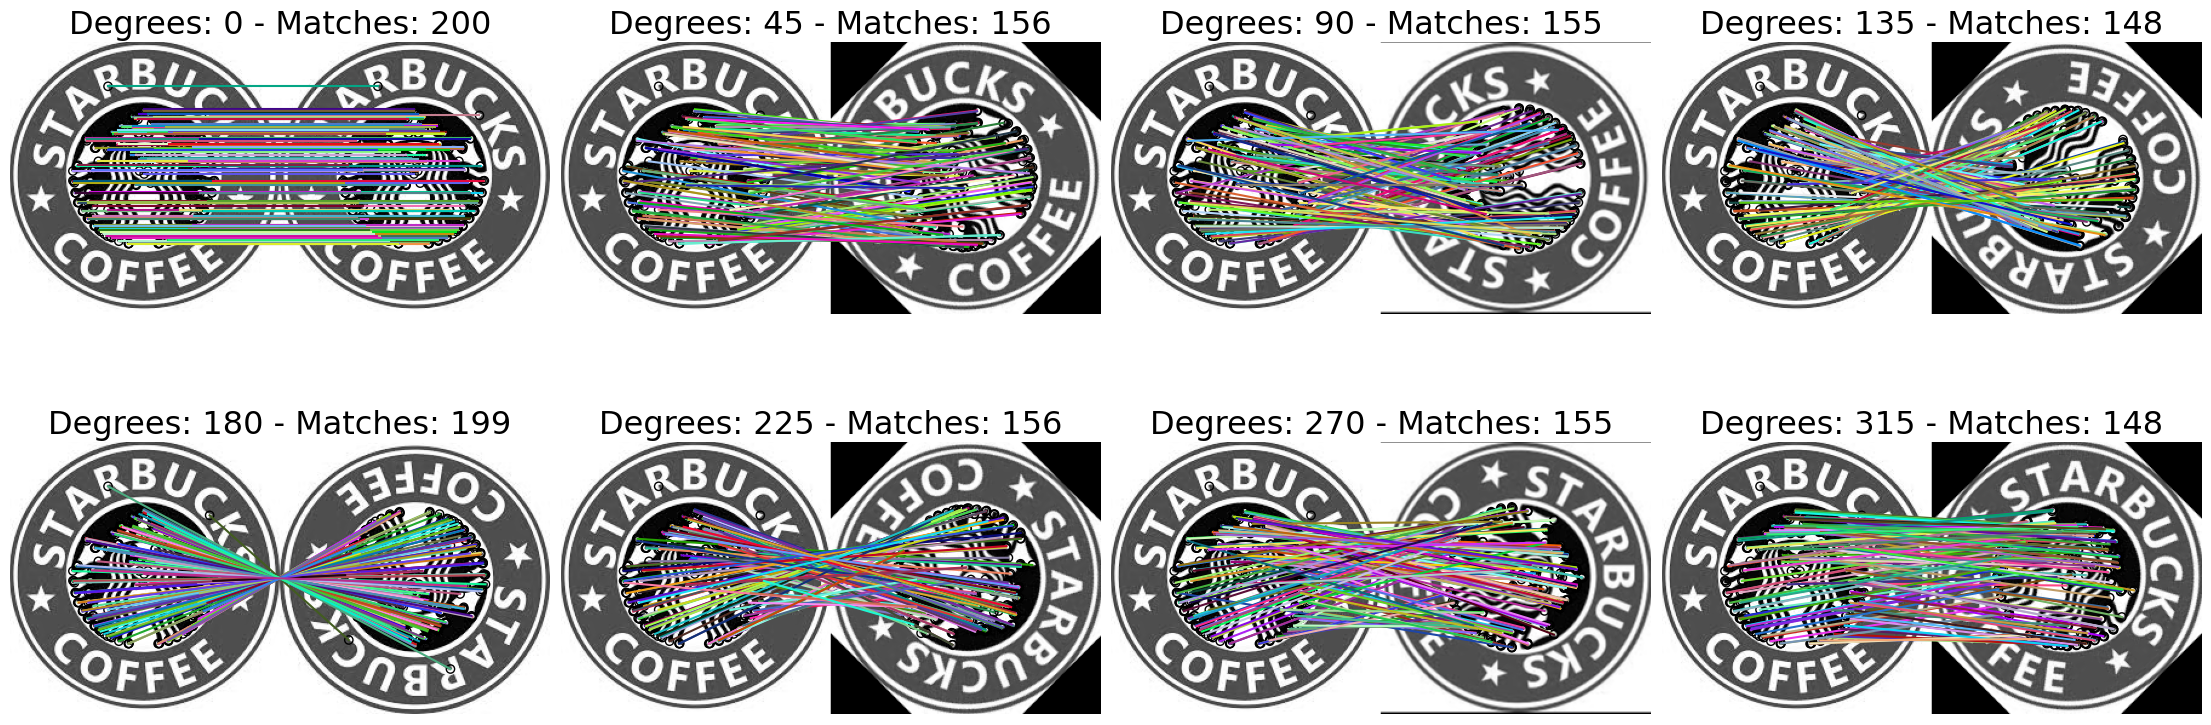

In [ ]:
# solution
degrees = [0, 45, 90, 135, 180, 225, 270, 315]
imgs = [transform.rotate(sbCol[''], degree) for degree in degrees]
titles = ['Degrees: {}'.format(i) for i in degrees]
ex4 = cp.custom_grids(imgs,2,4, axis= 'off', figsize = (22,8), title_size=23)
ex4.match_points(0,[0,1,2,3,4,5,6,7], autoTitles=titles)

*   What do you observe with respect to the change in orientations?

**Solution**

In general, the number of coincidences decreases when there is some degree of rotation, although there appears to be no direct relationship between the number of coincidences and the degree of rotation. The number of coincidences is almost identical between a 0° rotation and a 180° rotation, showing that this transformation has little effect on the number of coincidences. It is also interesting to observe that when the rotations are equal across an axis, as in the 45° rotation image and the 225° rotation image, the number of coincidences is the same. Both situations (0°-180° and 45°-225°) are probably due to the fact that the corners of each image are oriented in the same way with respect to the axes of each image, resulting in similar matches.

...

### Exercise: #5

*   Repeat **Exercise #3** using Coco-cola images using cocacola_logo.png as the model image.
*   Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?

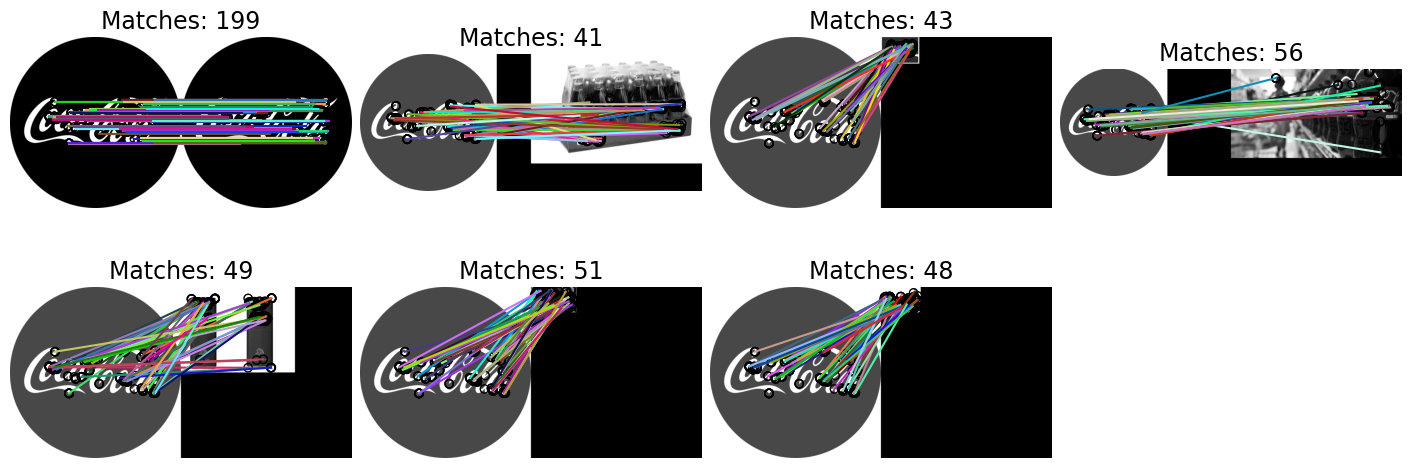

In [ ]:
ccCol = {i:io.imread_collection(imdir + f'cocacola/cocacola{i}.*')[0] for i in ['_logo',1,2,3,4,5,6]}
ex5 = cp.custom_grids(list(ccCol.values()),2,4, axis= 'off', title_size=17, figsize=(14,5))
ex5.match_points(0,[0,1,2,3,4,5,6], autoTitles=True)

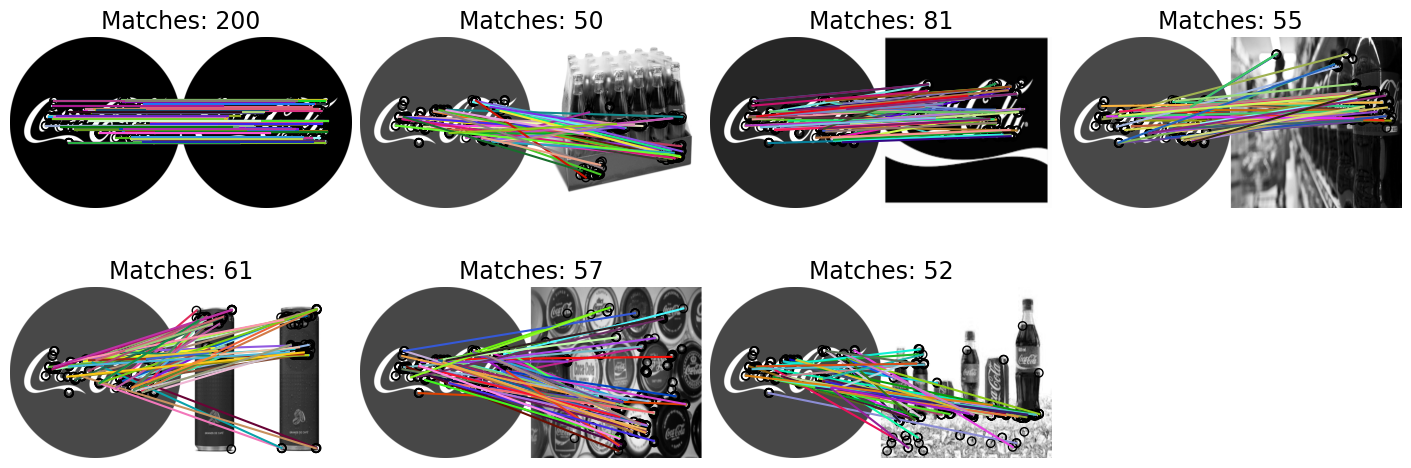

In [ ]:
# solution
ccCol = {i:transform.resize(io.imread_collection(imdir + f'cocacola/cocacola{i}.*')[0],(600,600)) for i in ['_logo',1,2,3,4,5,6]}
ex5 = cp.custom_grids(list(ccCol.values()),2,4, axis= 'off', title_size=17, figsize=(14,5))
ex5.match_points(0,[0,1,2,3,4,5,6], autoTitles=True)

**Solution**

The same parameters used when analyzing Starbucks images remained effective when analyzing Cocacola images. However, in the second experiment performed in this section, it can be seen that the scale between the images compared can have a slight effect on the number of descriptors located, since when the images are modified to have the same size, there is a slight increase in the number of matches than when they are drastically different in scale.

...

### Exercise #6. Analysis of the applied techniques and results

*   What are the advantages of ORB object detection compared with HOG object detector?

**Solution**

ORB offers clear advantages, as it performs well not only in edge detection, but also in corner detection. In addition, it shows remarkable tolerance to variations in orientation, perspective and size, as discussed above. In particular, in the ORB context, images that are quite distinct compared to the template can often produce satisfactory detections. In contrast, HOG tends to have difficulty identifying images that differ to some degree from the template.

...

*   What would happen if you analyse an image that does not contain the Starbucks logo (as is the case of "edificio.jpg")?

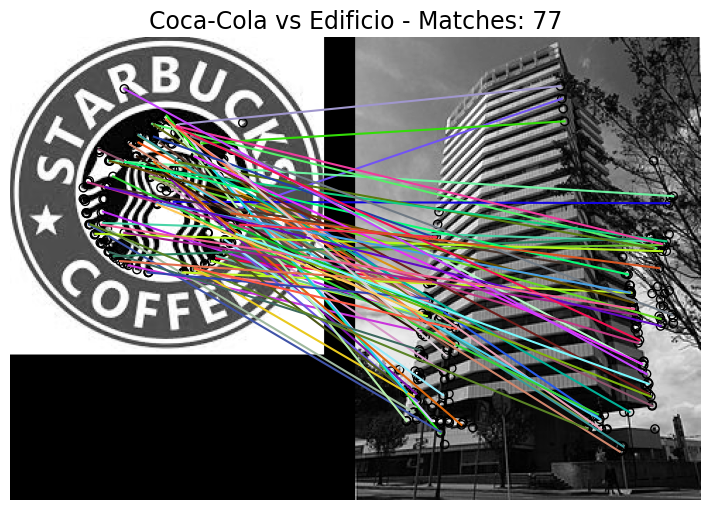

In [ ]:
# solution
edificio = io.imread(imdir + 'edificio.jpg')
ex6 = cp.custom_grids([sbCol[''],edificio],1,1, axis= 'off', title_size=17, figsize=(10,5))
ex6.match_points(0,[1], autoTitles=["Coca-Cola vs Edificio"])

**Solution**

As shown in the image above, the algorithm looks for corner matches within the image, even if the corners are not the same as those detected in the original image, but because they exceed the matching thresholds they are recorded as descriptors, which may result in more false detections.

...

*   What are the different ways of defining a quality measure for the correspondance between two images? (implementation of measures is not necessary)?

**Solution**

One way to ensure the quality of matches is to set the parameters maximum_ratio, maximum_distance and metric to values that, when used when comparing an image to itself, result in a satisfactory match. These values can be used with other images once this reference has been established.

...

# Panorama Stitching (Not graded)

Image Mosaicing is a technique of combining multiple overlapping images into a single image.

*   A simple tutorial can be found in this notebook:
*   https://github.com/scikit-image/skimage-tutorials/blob/main/lectures/solutions/adv3_panorama-stitching-solution.ipynb


---

## **End of P2_2: Corner Detection and ORB**
Deadline for P2_2 submission in CampusVirtual is: **6th of Novembre, 2023**
